Plotting with matplotlib
----------------
* First let try to <b>import</b> matplitlib package

In [7]:
import matplotlib.pyplot as plt

* Let's define some data
* Read the CSV file that we created from iprice product (leaf category quantities)

In [8]:
import csv
reader = csv.reader(open("category_quantity.csv", "rb"))
data = list(reader)
data = data[1:]    # Remove header
print data

[['accessories', '234412'], ['batteries', '3310'], ['tablets', '712'], ['screen-protectors', '52887'], ['bluetooth-headsets', '58814'], ['power-banks', '1538'], ['stylus-pens', '3087'], ['chargers', '44'], ['landline', '357'], ['prepaid-top-up-cards', '248'], ['screen-digitizers', '107'], ['smartwatches', '95811'], ['docks', '1517'], ['selfie-sticks', '14278'], ['solars', '194'], ['otg', '2954'], ['fitness-wristbands', '61113'], ['cable-chargers', '45281'], ['cases-covers', '2968738'], ['phones-tablets', '56'], ['plugy', '26'], ['mhl', '1039'], ['smartphones', '7292'], ['basic-phones', '184'], ['smart-glasses', '1281'], ['vr-boxes', '1534']]


* Convert the second column to float

In [57]:
data = [[x[0], int(x[1])] for x in data]
print data

[['accessories', 234412], ['batteries', 3310], ['tablets', 712], ['screen-protectors', 52887], ['bluetooth-headsets', 58814], ['power-banks', 1538], ['stylus-pens', 3087], ['chargers', 44], ['landline', 357], ['prepaid-top-up-cards', 248], ['screen-digitizers', 107], ['smartwatches', 95811], ['docks', 1517], ['selfie-sticks', 14278], ['solars', 194], ['otg', 2954], ['fitness-wristbands', 61113], ['cable-chargers', 45281], ['cases-covers', 2968738], ['phones-tablets', 56], ['plugy', 26], ['mhl', 1039], ['smartphones', 7292], ['basic-phones', 184], ['smart-glasses', 1281], ['vr-boxes', 1534]]


* Sort and take the top 5 categories

In [60]:
data.sort(key=lambda x: x[1], reverse=True)
data = data[0:5]
print data

[['cases-covers', 2968738], ['accessories', 234412], ['smartwatches', 95811], ['fitness-wristbands', 61113], ['bluetooth-headsets', 58814]]


* Transpose the list into 2 arrays, representing X and Y axis

In [61]:
x = [index for index, value in enumerate(data)]
y = [int(row[1]) for row in data]

print x
print y

[0, 1, 2, 3, 4]
[2968738, 234412, 95811, 61113, 58814]


* Now let's plot it

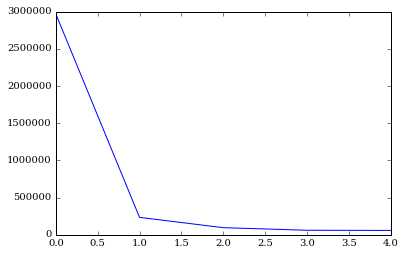

In [62]:
plt.plot(x, y)

In [63]:
plt.show()

What just happend? The default behavior will show the graph in a new windows!
-----------------------
* Now let's try to make the graph appear inline

In [64]:
%matplotlib inline

* The line above configures matplotlib to show figures embedded in the notebook, instead of opening new windows.
* Now let's try to show the graph again

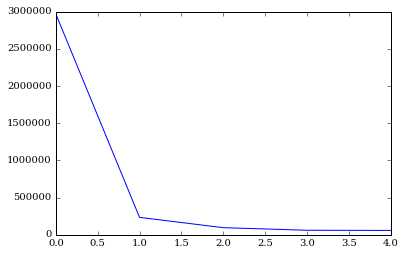

In [65]:
plt.plot(x, y)
plt.show()

* Let's change the line style
* (refer to documentation for more options: http://matplotlib.org/api/index.html)

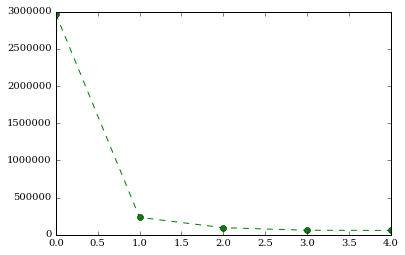

In [66]:
plt.plot(x, y, linestyle="dashed", marker="o", color="green")

* Let's add a title and labels to our graph

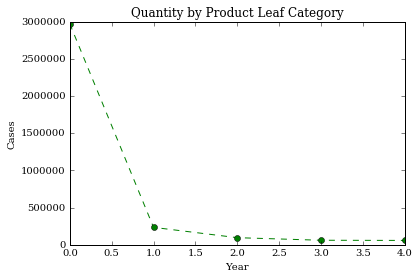

In [67]:
plt.plot(x, y, linestyle="dashed", marker="o", color="green")
plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Quantity by Product Leaf Category')
plt.show()

* Setting the ticket labels

In [68]:
x_labels = [value[0] for index, value in enumerate(data)]
print x_labels

['cases-covers', 'accessories', 'smartwatches', 'fitness-wristbands', 'bluetooth-headsets']


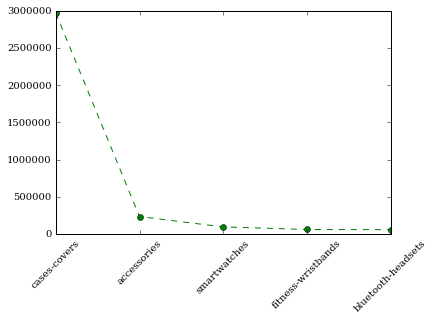

In [69]:
plt.xticks(x, x_labels, rotation=45)  # options for rotation: angle in degrees | ‘vertical’ | ‘horizontal’
plt.plot(x, y, linestyle="dashed", marker="o", color="green", label="death cases")

* We can use other method to solve the scaling problem. 
* For example, we can add new axes

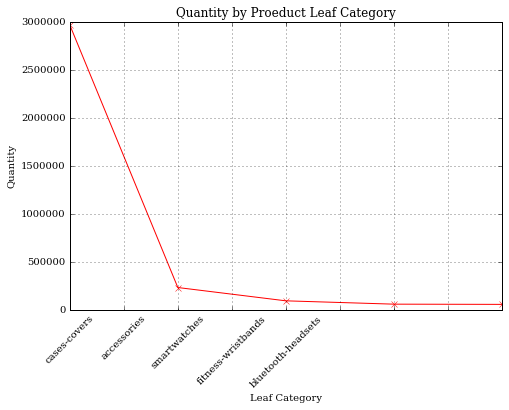

In [83]:
fig = plt.figure()

# Params = left, bottom, width, height
axes1 = fig.add_axes([0, 0, 1, 1]) 


axes1.set_xlabel('Leaf Category')
axes1.set_ylabel('Quantity')
axes1.set_title('Quantity by Proeduct Leaf Category');
axes1.set_xticks(x, x_labels)
axes1.set_xticklabels(x_labels, rotation=45)


axes1.grid(True)

* Changing configuration

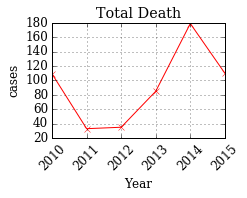

In [44]:
# method 1
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('save_figure.pdf')

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig = plt.figure()
axes1 = fig.add_axes([0.2, 0.2, 0.4, 0.4])

axes1.plot(x, total_cases, 'r', marker='x')
axes1.set_xlabel('Year')
axes1.set_ylabel('cases')
axes1.set_title('Total dengue cases')
axes1.set_xticklabels(x_labels, rotation=45)
axes1.grid(True)
pp.savefig(fig)

plt.close()
fig = plt.figure()
axes1 = fig.add_axes([0.2, 0.2, 0.4, 0.4])

axes1.plot(x, y, 'r', marker='x')
axes1.set_xlabel('Year')
axes1.set_ylabel('cases')
axes1.set_title('Total Death')
axes1.set_xticklabels(x_labels, rotation=45)
axes1.grid(True)
pp.savefig(fig)

pp.close()

    

In [ ]:
# method 2
with PdfPages('save_plot.pdf') as pdf:
    plt.xticks([0, 1, 2, 3, 4, 5], x_labels, rotation=45)
    plt.title = "Page 1"
    plt.xlabel = "Year"
    plt.ylabel = "Cases"
    plt.ylim(0, 200)
    plt.plot(x, y, linestyle="dashed", marker="o", color="g")
    plt.savefig(pdf, format='pdf')
#     pdf.savefig(plt.figure())
    plt.close()
    
    plt.xticks([0, 1, 2, 3, 4, 5], x_labels, rotation=45)
    plt.ylim(0, 100000)
    plt.title = "Page 1"
    plt.xlabel = "Year"
    plt.ylabel = "Cases"
    plt.plot(x, total_cases, linestyle="dashed", marker="o", color="g")
    plt.savefig(pdf, format='pdf')
    plt.close()

Bar chart
-----------

* Normal bar chart

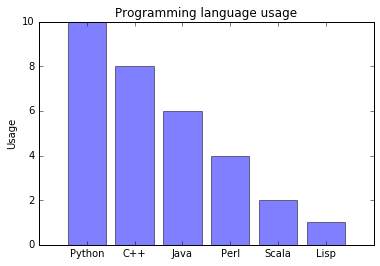

In [9]:
import numpy as np
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

* Horizontal bar chart

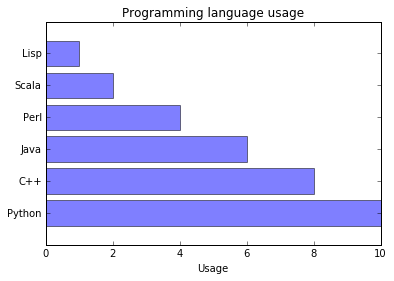

In [11]:
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')
 
plt.show()

* Multiple data series

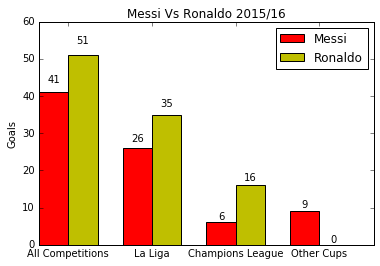

In [20]:
N = 4
messi = (41, 26, 6, 9)

x = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, messi, width, color='r')

ronaldo = (51, 35, 16, 0)
rects2 = ax.bar(x + width, ronaldo, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Goals')
ax.set_title('Messi Vs Ronaldo 2015/16')
ax.set_xticks(x + width)
ax.set_xticklabels(('All Competitions', 'La Liga', 'Champions League', 'Other Cups'))

ax.legend((rects1[0], rects2[0]), ('Messi', 'Ronaldo'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

* Stack chart

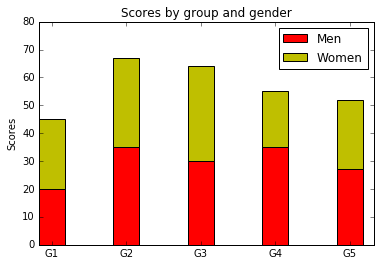

In [23]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r')
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
And here are some e